In [97]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

digits = datasets.load_digits()
y = digits.target
data = digits.images

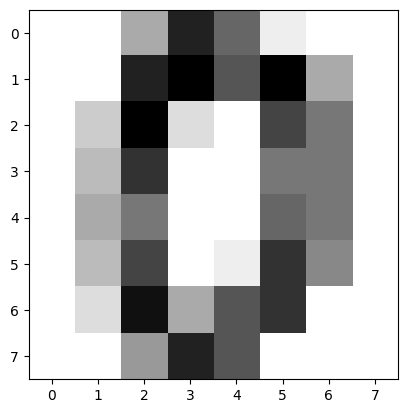

In [98]:
plt.imshow(data[0], cmap=plt.cm.gray_r)

In [99]:
n_samples = len(data)
data = data.reshape([n_samples, -1])

In [100]:
clf = svm.SVC(kernel="linear")
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.3, random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.9796296296296296

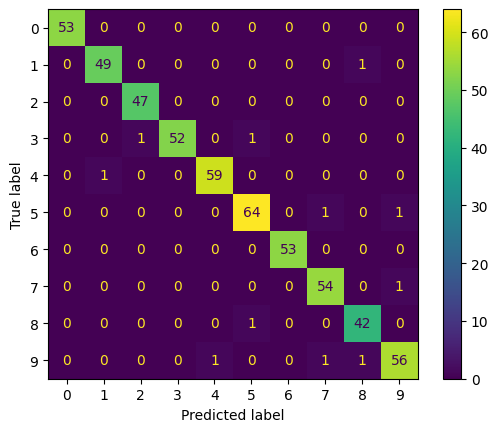

In [102]:
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

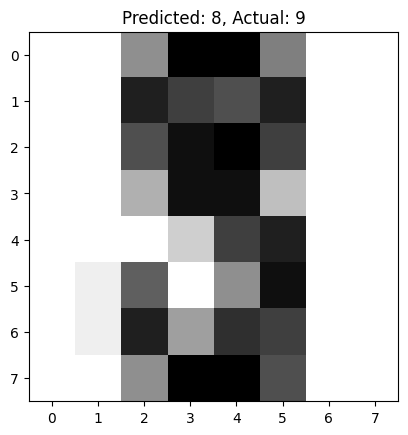

In [111]:
for i in range(0, len(y_pred)):
    if y_pred[i] != y_test[i]:
        image = X_test[i]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap=plt.cm.gray_r)
        plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
        plt.savefig(f"{i}.png")